In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk

In [2]:
data = pd.read_csv('YoutubeData.csv')
data.head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,region
0,aaOB-ErYq6Y,2017-11-14,Waymo's fully self-driving cars are here,Waymo,2017-11-07,28,16:03:12,"self-driving car|""waymo""|""self-driving""|""drive...",665232,6485,714,2497,https://i.ytimg.com/vi/aaOB-ErYq6Y/default.jpg,False,False,False,"Waymo, which started as the Google self-drivin...",Science & Technology,Great Britan
1,XPrHD-7jjUs,2018-02-12,This Hidden 300 Foot Stretch Of The Berlin Wal...,VICE News,2018-02-05,25,17:15:48,"300 foot|""VICE News Tonight""|""VICE News""|""Berl...",52637,1005,51,132,https://i.ytimg.com/vi/XPrHD-7jjUs/default.jpg,False,False,False,The Berlin Wall was the ultimate symbol of the...,News & Politics,Great Britan
2,UOgNUOKYXiA,2018-05-13,Durga | Full Ep 1068 | 11th May 2018 | Odia Se...,Tarang TV,2018-05-12,24,06:00:01,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",87291,340,74,31,https://i.ytimg.com/vi/UOgNUOKYXiA/default.jpg,False,False,False,Durga: Story of a revengeful daughter who ente...,Entertainment,India
3,W1LO7Zk_38o,2018-02-01,ÐÐ«Ð¡ÐÐÐÐÐÐ ÐÐÐ®Ð¡ Â«ÐÐÐ ÐÐÐÐ¦Ð...,Sasha Sotnik,2018-01-29,25,16:00:05,"Ð¶Ð¸Ð»ÑÐµ|""Ð²ÑÑÐµÐ»ÐµÐ½Ð¸Ðµ""|""Ð°Ð²Ð°ÑÐ¸Ð¹Ð...",139389,11135,954,2903,https://i.ytimg.com/vi/W1LO7Zk_38o/default.jpg,False,False,False,ÐÑÐ°Ð¶Ð´Ð°Ð½Ðµ Ð Ð¾ÑÑÐ¸Ð¸ Ð¿ÑÐ¾Ð´Ð¾Ð»Ð¶Ð°...,News & Politics,Russia
4,BmEvz7tkoks,2018-01-14,"Amlo canta Las MaÃ±anitas a su esposa, por su ...",Viral Pancho,2018-01-13,27,23:36:07,"amlo|""pena nieto""|""elecciones 2018""|""politica ...",57778,3689,69,691,https://i.ytimg.com/vi/BmEvz7tkoks/default.jpg,False,False,False,Mexico va a votar por amlo por las propuestas ...,Education,Mexico


In [16]:
#All distinct regions
countries = data['region'].unique()
countries

array(['Great Britan', 'India', 'Russia', 'Mexico', 'Japan',
       'United States', 'France', 'Denmark', 'South Korea', 'Canada'],
      dtype=object)

In [20]:
size=[]
for i in countries:
    select = data.loc[data['region']==i] #Selects all rows of a particular country
    total_rows = len(select.index)
    size.append(total_rows)

In [10]:
accuracy1=[]
accuracy2=[]
precision_data1 = []
recall_data1 = []
precision_data2 = []
recall_data2 = []

## Feature Generation using BoW

In [11]:
def BoW(c):
    
    testsize=c/100
    
    from sklearn.feature_extraction.text import CountVectorizer
    from nltk.tokenize import RegexpTokenizer
    #tokenizer to remove unwanted elements from out data like symbols and numbers
    token = RegexpTokenizer(r'[a-zA-Z0-9]+')
    cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)    
    text_counts= cv.fit_transform(data['title'])
    
    #Splitting Data
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        text_counts, data['region'], test_size=testsize, random_state=1)
    
    from sklearn.naive_bayes import MultinomialNB
    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics
    # Model Generation Using Multinomial Naive Bayes
    clf = MultinomialNB().fit(X_train, y_train)
    predicted= clf.predict(X_test) 
    
    #Accuracy
    print("MultinomialNB Accuracy for Configuration " + str(100-c) + ":" + str(c) + " is "
          + str( round(metrics.accuracy_score(y_test, predicted)*100 , 2) )+ "%")
    accuracy1.append(metrics.accuracy_score(y_test, predicted)*100)
    
    # Precision
    from sklearn.metrics import precision_score
    precision_data1.append(precision_score(y_test, predicted,average=None)*100)
    
    # Recall
    from sklearn.metrics import recall_score
    recall_data1.append(recall_score(y_test, predicted,average=None)*100)

## Accuracy

In [12]:
config =[ [50,50] , [60,40], [70,30], [80,20] , [90,10] ]
for i in config:
    BoW(i[1])

MultinomialNB Accuracy for Configuration 50:50 is 62.85%
MultinomialNB Accuracy for Configuration 60:40 is 63.62%
MultinomialNB Accuracy for Configuration 70:30 is 63.61%
MultinomialNB Accuracy for Configuration 80:20 is 63.95%
MultinomialNB Accuracy for Configuration 90:10 is 64.51%


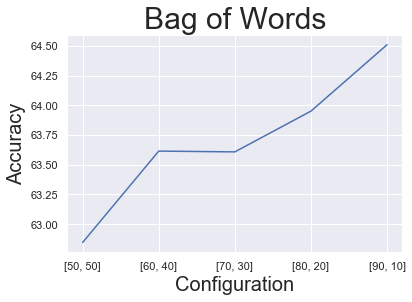

In [13]:
K = [1,2,3,4,5]
plt.plot(K,accuracy1)
plt.xlabel('Configuration' , fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('Bag of Words',fontsize=30)
plt.xticks(K,config)
plt.show()

## Precision , Recall at Split 90:10

In [21]:
summary = pd.DataFrame()
summary['Class'] = countries
summary['Instances'] = size
summary['Precision'] = precision_data1[4]
summary['Recall'] = recall_data1[4]

In [22]:
summary

,Class,Instances,Precision,Recall
0,Great Britan,38916,25.830654,47.405950
1,India,37352,89.166941,66.437684
2,Russia,40739,86.848204,74.171202
3,Mexico,40451,59.805207,80.590611
4,Japan,20523,86.029017,85.982814
5,United States,40949,85.335413,26.853216
6,France,40724,94.210113,89.497262
7,Denmark,40840,59.722692,43.691242
8,South Korea,34567,61.914716,42.447693
9,Canada,40881,59.363217,68.487192


## Feature Generation using TF-IDF

In [23]:
def TF_IDF(c):
    
    testsize=c/100
    
    from sklearn.feature_extraction.text import TfidfVectorizer
    tf=TfidfVectorizer()
    text_tf= tf.fit_transform(data['title'])
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        text_tf, data['region'], test_size=testsize, random_state=123)
    
    from sklearn.naive_bayes import MultinomialNB
    from sklearn import metrics
    # Model Generation Using Multinomial Naive Bayes
    clf = MultinomialNB().fit(X_train, y_train)
    predicted= clf.predict(X_test)
    
    #Accuracy
    print("MultinomialNB Accuracy for Configuration " + str(100-c) + ":" + str(c) + " is "
          + str( round(metrics.accuracy_score(y_test, predicted)*100 , 2) )+ "%")
    accuracy2.append(metrics.accuracy_score(y_test, predicted)*100)
    
    # Precision
    from sklearn.metrics import precision_score
    precision_data2.append(precision_score(y_test, predicted,average=None)*100)
    
    # Recall
    from sklearn.metrics import recall_score
    recall_data2.append(recall_score(y_test, predicted,average=None)*100)

## Accuracy

In [24]:
for i in config:
    TF_IDF(i[1])

MultinomialNB Accuracy for Configuration 50:50 is 78.8%
MultinomialNB Accuracy for Configuration 60:40 is 78.94%
MultinomialNB Accuracy for Configuration 70:30 is 79.16%
MultinomialNB Accuracy for Configuration 80:20 is 79.38%
MultinomialNB Accuracy for Configuration 90:10 is 79.43%


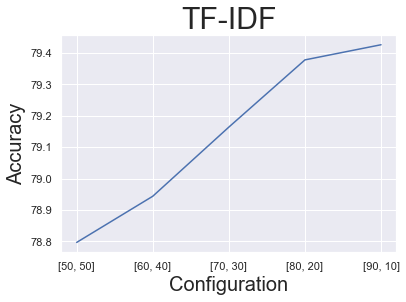

In [25]:
K = [1,2,3,4,5]
plt.plot(K,accuracy2)
plt.xlabel('Configuration' , fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('TF-IDF',fontsize=30)
plt.xticks(K,config)
plt.show()

## Precision , Recall at Split 90:10 

In [27]:
summary = pd.DataFrame()
summary['Class'] = countries
summary['Instances'] = size
summary['Precision'] = precision_data2[4]
summary['Recall'] = recall_data2[4]
summary

,Class,Instances,Precision,Recall
0,Great Britan,38916,49.519474,48.238482
1,India,37352,92.312442,73.500492
2,Russia,40739,86.627310,81.877729
3,Mexico,40451,62.661448,79.930105
4,Japan,20523,90.145396,90.854817
5,United States,40949,99.129962,87.266635
6,France,40724,94.860186,90.705373
7,Denmark,40840,98.504399,82.167319
8,South Korea,34567,96.599691,91.992935
9,Canada,40881,57.284586,75.060183


# Comparison b/w TF-IDF and BoW Models

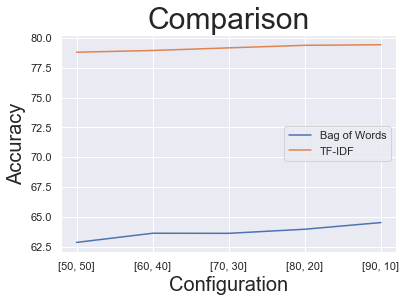

In [26]:
plt.plot(K,accuracy1, label = "Bag of Words")
plt.plot(K,accuracy2,label= "TF-IDF")
plt.xlabel('Configuration' , fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title("Comparison",fontsize=30)
plt.xticks(K,config)
plt.legend()
plt.show()

In [ ]:
#TF-IDF has higher accuracy than BoW